In [1]:
import json, os
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
#TEST_ITERATIONS = ["6/"+x for x in os.listdir("../results/4")]
TEST_ITERATIONS = ["6"]

In [5]:
results = []
for TEST_ITERATION in TEST_ITERATIONS:
	folder = f"../results/{TEST_ITERATION}"

	file_names = os.listdir(folder)

	for file_name in file_names:
		if file_name.startswith("_") or not file_name.endswith(".json"):
			continue
		with open(os.path.join(folder, file_name), "r") as file:
			data = json.load(file)
			data["path"] = folder
			results.append(data)

In [74]:
results[0]

{'fileName': 'vc_25_150_06.txt',
 'graph': {'n': 25, 'm': 150, 'd': 0.5},
 'problemClass': 'SPI',
 'testInstanceName': '150',
 'testInstanceVersion': '06.txt',
 'performanceMetrics': {'generations': [{'best': 332.0,
    'objective': 332,
    'avg': 609.0866666666667,
    'evals': 228},
   {'best': 329.0, 'objective': 329, 'avg': 472.1, 'evals': 309},
   {'best': 166.0, 'objective': 166, 'avg': 411.99333333333334, 'evals': 397},
   {'best': 166.0, 'objective': 166, 'avg': 376.1333333333333, 'evals': 474},
   {'best': 138.0, 'objective': 138, 'avg': 332.98, 'evals': 544},
   {'best': 138.0, 'objective': 138, 'avg': 279.00666666666666, 'evals': 629},
   {'best': 113.0, 'objective': 113, 'avg': 208.72666666666666, 'evals': 707},
   {'best': 113.0, 'objective': 113, 'avg': 164.84666666666666, 'evals': 770},
   {'best': 113.0, 'objective': 113, 'avg': 161.8, 'evals': 850},
   {'best': 113.0, 'objective': 113, 'avg': 154.67333333333335, 'evals': 935},
   {'best': 113.0, 'objective': 113, 'avg

In [6]:
rows = []

for entry in results:
    path = entry.get('path')
    fileName = entry.get('fileName')
    graph = entry.get('graph', {})
    problemClass = entry.get('problemClass')
    testInstanceName = entry.get('testInstanceName')
    testInstanceVersion = entry.get('testInstanceVersion')
    
    # Overall objective at the run level (if applicable)
    overall_objective = entry.get('performanceMetrics', {}).get('objective')
    
    # Get the list of generations
    generations = entry.get('performanceMetrics', {}).get('generations', [])
    
    # Create a row per generation with additional metadata.
    for gen_index, gen in enumerate(generations):
        row = {
            'path': path,
            'fileName': fileName,
            'graph_n': graph.get('n'),
            'graph_m': graph.get('m'),
            'graph_d': graph.get('d'),
            'problemClass': problemClass,
            'testInstanceName': int(testInstanceName),
            'testInstanceVersion': testInstanceVersion,
            'overall_objective': overall_objective,
            'generation': gen_index,
            'gen_best': gen.get('best'),
            'gen_objective': gen.get('objective'),
            'gen_avg': gen.get('avg'),
            'gen_evals': gen.get('evals'),
        }
        rows.append(row)

# Create the DataFrame.
df = pd.DataFrame(rows)

# Iteration 2

In [46]:
df_filtered = df#.loc[df['gen_evals'] < 20_000]

df_filtered.loc[:, 'populationSize'] = df_filtered['path'].apply(lambda x: int(x.split('/')[-1]))

df_sorted = df_filtered.sort_values(by=['populationSize', 'problemClass', 'testInstanceName', 'testInstanceVersion', 'generation'])

# Select the last generation for each problemClass/testInstanceName/testInstanceVersion
last_gen_df = df_sorted.loc[df_sorted.groupby(['populationSize', 'problemClass', 'testInstanceName', 'testInstanceVersion'])['generation'].idxmax()]

last_gen_df.groupby(['populationSize', 'problemClass', 'testInstanceName']).agg({
	#'gen_best': 'mean',
	'gen_objective': 'mean'
}).sort_values(by=['populationSize','problemClass', 'testInstanceName']).reset_index().set_index(['populationSize', 'problemClass', 'testInstanceName']).unstack(level='populationSize')



/tmp/ipykernel_140299/4169853972.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.loc[:, 'populationSize'] = df_filtered['path'].apply(lambda x: int(x.split('/')[-1]))


gen_objective                             \
populationSize                         50       75       100      125    
problemClass testInstanceName                                            
LPI          10000                  12560.8  12126.3  12317.3  12398.7   
MPI          500                      848.4    913.2    903.5    888.2   
             750                     2777.4   2835.2   2773.6   2796.8   
             2000                     224.2    226.3    223.9    214.3   
             3000                    1028.4   1082.8   1027.2    975.2   
SPI          60                       188.4    174.8    178.3    173.8   
             120                       90.1     91.1     92.2     83.8   
             150                      120.6    120.6    113.7    118.2   

                                                                            
populationSize                    150      175      200      400      1000  
problemClass testInstanceName                                               
LPI          10000             11881.6  12703.6  12752.4  12364.1  15368.6  
MPI          500                 822.7    852.1    814.8    787.1    861.7  
             750                2731.7   2693.7   2845.4   2586.1   2945.4  
             2000                209.9    228.9    218.6    202.4    210.9  
             3000                988.7   1106.7   1064.6    937.6   1297.0  
SPI          60                  177.5    179.9    177.5    174.6    174.3  
             120                  84.3     83.2     86.2     83.9     83.7  
             150                 112.5    116.0    114.5    115.7    112.9

In [97]:
last_gen_df.groupby(['populationSize']).agg({
	#'gen_best': 'mean',
	'gen_objective': 'mean'
}).T


populationSize,50,75,100,125,150,175,200,400,1000
gen_objective,2229.7875,2196.2875,2203.7125,2206.125,2126.1125,2245.5125,2259.25,2156.4375,2631.8125


# Iteration 3

In [59]:
df_filtered = df#.loc[df['gen_evals'] < 20_000]

df_filtered.loc[:, 'MUTB_CXPB'] = df_filtered['path'].apply(lambda x: (x.split('/')[-1]))

df_sorted = df_filtered.sort_values(by=['MUTB_CXPB', 'problemClass', 'testInstanceName', 'testInstanceVersion', 'generation'])

# Select the last generation for each problemClass/testInstanceName/testInstanceVersion
last_gen_df = df_sorted.loc[df_sorted.groupby(['MUTB_CXPB', 'problemClass', 'testInstanceName', 'testInstanceVersion'])['generation'].idxmax()]

last_gen_df.groupby(['MUTB_CXPB', 'problemClass', 'testInstanceName']).agg({
	#'gen_best': 'mean',
	'gen_objective': 'mean'
}).sort_values(by=['MUTB_CXPB', 'problemClass', 'testInstanceName']).reset_index().set_index(['MUTB_CXPB', 'problemClass', 'testInstanceName']).unstack(level='MUTB_CXPB')


/tmp/ipykernel_140299/3619624832.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.loc[:, 'MUTB_CXPB'] = df_filtered['path'].apply(lambda x: (x.split('/')[-1]))


gen_objective                             \
MUTB_CXPB                          0.01_0.3 0.01_0.5 0.01_0.7 0.05_0.3   
problemClass testInstanceName                                            
LPI          10000                  16241.1  16163.2  16266.1  13749.4   
MPI          500                     1117.5   1099.6   1096.3    955.9   
             750                     3542.4   3484.9   3401.8   3021.5   
             2000                     383.2    390.6    374.5    257.2   
             3000                    1833.4   1925.6   1904.7   1254.3   
SPI          60                       211.1    195.5    184.1    179.6   
             120                      101.5     92.4     98.3     89.3   
             150                      134.2    122.5    120.9    132.5   

                                                                            \
MUTB_CXPB                     0.05_0.5 0.05_0.7 0.15_0.3 0.15_0.4 0.15_0.5   
problemClass testInstanceName                                                
LPI          10000             14505.8  14355.8  12818.8  12618.3  13013.5   
MPI          500                1007.0    987.5    886.3    885.4    894.2   
             750                3168.7   3020.5   2681.7   2838.4   2811.7   
             2000                280.8    302.6    219.9    212.3    234.0   
             3000               1407.0   1450.0   1094.9   1139.1   1143.0   
SPI          60                  179.3    184.6    174.1    175.3    175.6   
             120                  97.1     95.0     88.6     85.9     83.9   
             150                 132.2    123.1    113.4    112.5    113.3   

                                                                            \
MUTB_CXPB                      0.1_0.3  0.1_0.4  0.1_0.5  0.1_0.7 0.25_0.3   
problemClass testInstanceName                                                
LPI          10000             13048.6  13137.3  13466.5  13839.7  12120.6   
MPI          500                 916.0    878.6    879.7    925.3    824.7   
             750                2892.0   2833.3   2931.9   3006.3   2637.4   
             2000                235.7    219.7    240.1    269.3    214.9   
             3000               1191.8   1164.9   1170.7   1271.0    964.9   
SPI          60                  176.2    187.5    176.5    185.5    177.2   
             120                  84.0     90.2     86.4     88.2     88.3   
             150                 113.7    118.4    116.4    124.0    114.8   

                                                                            
MUTB_CXPB                     0.25_0.4 0.25_0.5  0.2_0.3  0.2_0.4  0.2_0.5  
problemClass testInstanceName                                               
LPI          10000             12099.6  11686.0  12302.4  12135.3  12324.3  
MPI          500                 807.5    848.3    806.0    864.6    850.6  
             750                2656.4   2656.9   2729.6   2760.2   2683.9  
             2000                205.4    207.8    213.9    244.5    217.5  
             3000               1007.8   1070.6   1009.3   1093.5   1037.4  
SPI          60                  172.7    172.7    176.0    185.5    177.0  
             120                  85.5     85.6     87.7     85.6     84.0  
             150                 118.4    118.7    111.0    112.9    116.8

In [63]:
df_filtered = df

df_filtered.loc[:, 'MUTB_CXPB'] = df['path'].apply(lambda x: (x.split('/')[-1]))

df_filtered = df_filtered.loc[df_filtered['MUTB_CXPB'] == '0.25_0.4']


# Sort to ensure last generation is correctly identified
df_sorted = df_filtered.sort_values(by=['problemClass', 'testInstanceName', 'testInstanceVersion', 'generation'])

# Select the last generation for each problemClass/testInstanceName/testInstanceVersion
last_gen_df = df_sorted.loc[df_sorted.groupby(['problemClass', 'testInstanceName', 'testInstanceVersion'])['generation'].idxmax()]

result = last_gen_df.groupby(['problemClass', 'testInstanceName']).agg({
	#'gen_best': 'mean',
	'gen_objective': 'mean',
	'gen_evals': 'mean'
}).reset_index().sort_values(by=['problemClass', 'testInstanceName'])

# Display or save result
result


,problemClass,testInstanceName,gen_objective,gen_evals
0,LPI,10000,12093.5,20000.0
1,MPI,500,807.8,20000.0
2,MPI,750,2656.4,20000.0
3,MPI,2000,205.4,20000.0
4,MPI,3000,1007.8,20000.0
5,SPI,60,172.7,20000.0
6,SPI,120,85.5,20000.0
7,SPI,150,118.4,20000.0


# Iteration 4

In [76]:
df_filtered = df

df_filtered.loc[:, 'K'] = df_filtered['path'].apply(lambda x: int(x.split('/')[-1]))

df_sorted = df_filtered.sort_values(by=['K', 'problemClass', 'testInstanceName', 'testInstanceVersion', 'generation'])

# Select the last generation for each problemClass/testInstanceName/testInstanceVersion
last_gen_df = df_sorted.loc[df_sorted.groupby(['K', 'problemClass', 'testInstanceName', 'testInstanceVersion'])['generation'].idxmax()]

last_gen_df.groupby(['K', 'problemClass', 'testInstanceName']).agg({
	#'gen_best': 'mean',
	'gen_objective': 'mean'
}).sort_values(by=['K', 'problemClass', 'testInstanceName']).reset_index().set_index(['K', 'problemClass', 'testInstanceName']).unstack(level='K')


gen_objective                           
K                                         2        3        4        5
problemClass testInstanceName                                         
LPI          10000                  11693.3  11999.1  12504.7  12619.1
MPI          500                      815.7    874.8    833.0    841.9
             750                     2657.8   2720.9   2720.9   2792.3
             2000                     228.3    198.0    200.4    214.1
             3000                     905.1   1000.4   1108.1   1103.4
SPI          60                       177.7    172.7    178.1    176.5
             120                       85.0     86.5     83.8     83.7
             150                      113.8    114.3    116.4    111.6

In [77]:
df_filtered = df

df_filtered.loc[:, 'K'] = df['path'].apply(lambda x: int(x.split('/')[-1]))

df_filtered = df_filtered.loc[df_filtered['K'] == 2]


# Sort to ensure last generation is correctly identified
df_sorted = df_filtered.sort_values(by=['problemClass', 'testInstanceName', 'testInstanceVersion', 'generation'])

# Select the last generation for each problemClass/testInstanceName/testInstanceVersion
last_gen_df = df_sorted.loc[df_sorted.groupby(['problemClass', 'testInstanceName', 'testInstanceVersion'])['generation'].idxmax()]

result = last_gen_df.groupby(['problemClass', 'testInstanceName']).agg({
	#'gen_best': 'mean',
	'gen_objective': 'mean',
	'gen_evals': 'mean'
}).reset_index().sort_values(by=['problemClass', 'testInstanceName'])

# Display or save result
result


,problemClass,testInstanceName,gen_objective,gen_evals
0,LPI,10000,11693.3,20000.0
1,MPI,500,815.7,20000.0
2,MPI,750,2657.8,20000.0
3,MPI,2000,228.3,20000.0
4,MPI,3000,905.1,20000.0
5,SPI,60,177.7,20000.0
6,SPI,120,85.0,20000.0
7,SPI,150,113.8,20000.0


# Iteration 1

In [4]:
for generations in results:
	continue
	df = pd.DataFrame(generations["performanceMetrics"]["generations"])
	plt.figure(figsize=(10, 5))
	plt.plot(df.index, df["best"], label="Best Fitness", marker='o')
	plt.plot(df.index, df["avg"], label="Average Fitness", marker='s')
	plt.xlabel("Generations")
	plt.ylabel("Fitness")
	plt.title("GA Evolution: Best vs Average Fitness")
	plt.legend()
	plt.grid()
	plt.show()

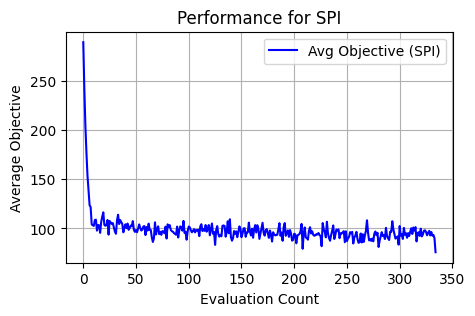

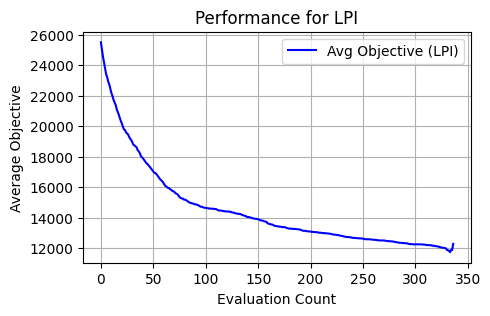

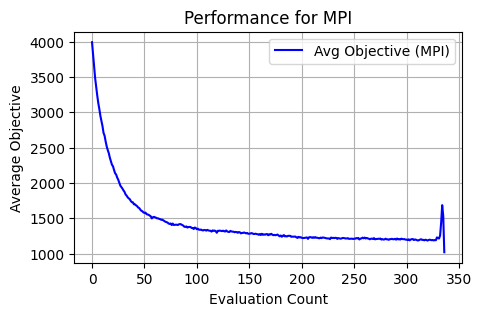

In [31]:
TEST_ITERATION = "2/150"

for entry in results:
    problem_class = entry['problemClass']
    generations = entry['performanceMetrics']['generations']
    
    # Extract evaluation counts and objectives for each generation.
    evals = [gen['evals'] for gen in generations]
    objectives = [gen['objective'] for gen in generations]
    
    # Create an entry for the problem class if it does not exist.
    if problem_class not in problem_classes:
        # Store the evaluation counts once (assuming they are identical across instances)
        problem_classes[problem_class] = {'evals': evals, 'objectives': []}
    
    # Append the objectives list for this instance.
    problem_classes[problem_class]['objectives'].append(objectives)

# Create the output directory for the plots.
output_dir = os.path.join("..", "results", str(TEST_ITERATION), "plots")
os.makedirs(output_dir, exist_ok=True)

# Generate plots for each problem class.
for problem_class, data in problem_classes.items():
    evals = data['evals']
    objectives_lists = data['objectives']
    
    # If instances might have different lengths, pad them with NaNs.
    max_len = max(len(lst) for lst in objectives_lists)
    objectives_arrays = np.array([lst + [np.nan] * (max_len - len(lst)) for lst in objectives_lists])
    
    # Compute the average objective at each evaluation count.
    avg_objectives = np.nanmean(objectives_arrays, axis=0)
    
    plt.figure(figsize=(8, 5))
    # Plot using evaluation counts as the x-axis.
    plt.plot(evals, avg_objectives, marker='o', linestyle='-', label='Average Objective', color='blue')
    
    plt.title(f'Performance for {problem_class}')
    plt.xlabel('Evaluation Count')
    plt.ylabel('Objective (Best Value)')
    plt.legend()
    plt.grid(True)
    
    file_path = os.path.join(output_dir, f"objective_vs_evals_{problem_class}.jpg")
    plt.savefig(file_path, format='jpg', dpi=300)
    plt.show()

# Iteration 5

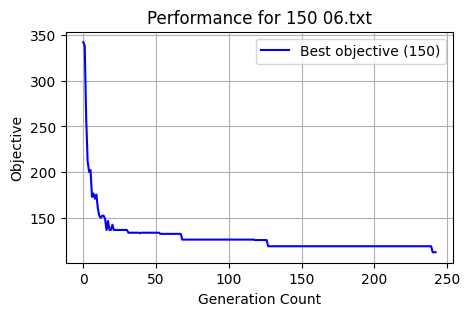

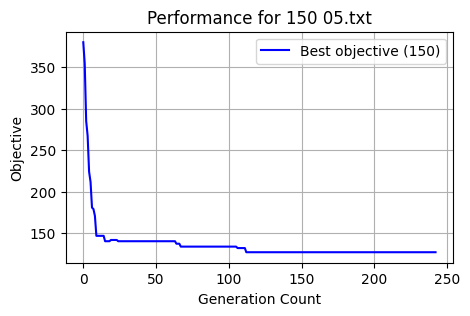

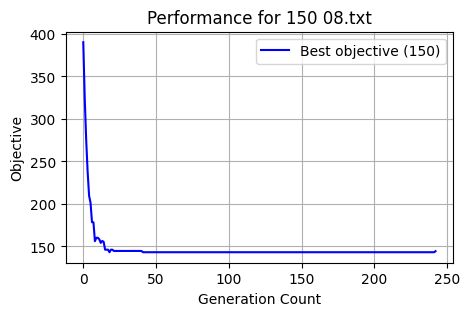

In [48]:
TEST_ITERATION = "5"

# Create the output directory for the plots.
output_dir = os.path.join("..", "results", str(TEST_ITERATION), "plots")
os.makedirs(output_dir, exist_ok=True)

problem_classes = df["testInstanceName"].unique()

# Plot for each problem class
for problem_class in problem_classes[:1]:
    for testInstanceVersion in df[df["testInstanceName"] == problem_class]["testInstanceVersion"].unique():

        if testInstanceName != "150":
            continue
        if int(testInstanceVersion.split(".")[0]) not in [5, 6, 8]:
            continue

        plt.figure(figsize=(5, 3))

        # Filter data for the specific problem class
        df_subset = df[(df["testInstanceName"] == problem_class) & (df["testInstanceVersion"] == testInstanceVersion)]

        df_grouped = df_subset.groupby("generation", as_index=False).agg({
            "gen_best": "mean"
        })

        # Plot evaluation counts vs. avg objective
        plt.plot(df_grouped["generation"], df_grouped["gen_best"], marker='', linestyle='-', label=f'Best objective ({problem_class})', color='blue')

        # Titles and labels
        plt.title(f'Performance for {problem_class} {testInstanceVersion}')
        plt.xlabel('Generation Count')
        plt.ylabel('Objective')
        plt.legend()
        plt.grid(True)

        file_path = os.path.join(output_dir, f"objective_vs_gen_{problem_class}_{testInstanceVersion}.jpg")
        plt.savefig(file_path, format='jpg', dpi=300)
        plt.show()

        # Show the plot
        plt.show()

In [44]:

# Sort to ensure last generation is correctly identified
df_sorted = df.sort_values(by=['problemClass', 'testInstanceName', 'testInstanceVersion', 'generation'])

# Select the last generation for each problemClass/testInstanceName/testInstanceVersion
last_gen_df = df_sorted.loc[df_sorted.groupby(['problemClass', 'testInstanceName', 'testInstanceVersion'])['generation'].idxmax()]

result = last_gen_df.groupby(['problemClass', 'testInstanceName']).agg({
	#'gen_best': 'mean',
	'gen_objective': 'mean',
	'gen_evals': 'mean'
}).reset_index().sort_values(by=['problemClass', 'testInstanceName'])

# Display or save result
result

,problemClass,testInstanceName,gen_objective,gen_evals
0,LPI,10000,11426.8,20000.0
1,MPI,500,834.7,19459.4
2,MPI,750,2479.1,20000.0
3,MPI,2000,226.9,19335.8
4,MPI,3000,917.4,20000.0
5,SPI,60,176.8,12075.9
6,SPI,120,83.5,10097.8
7,SPI,150,113.0,11900.9


# Iteration 6

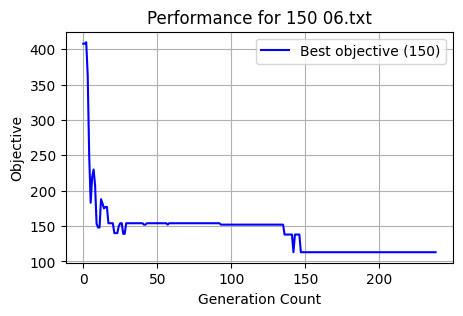

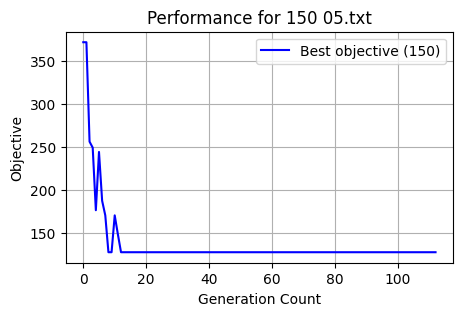

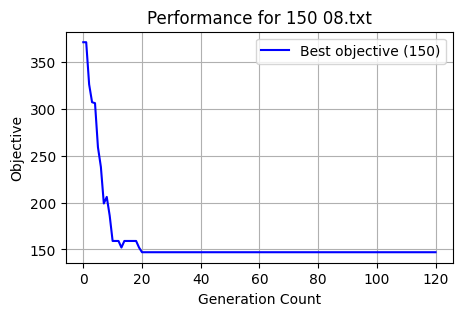

In [7]:
TEST_ITERATION = "6"

# Create the output directory for the plots.
output_dir = os.path.join("..", "results", str(TEST_ITERATION), "plots")
os.makedirs(output_dir, exist_ok=True)

problem_classes = df["testInstanceName"].unique()

# Plot for each problem class
for problem_class in problem_classes[:1]:
    for testInstanceVersion in df[df["testInstanceName"] == problem_class]["testInstanceVersion"].unique():

        if testInstanceName != "150":
            continue
        if int(testInstanceVersion.split(".")[0]) not in [5, 6, 8]:
            continue

        plt.figure(figsize=(5, 3))

        # Filter data for the specific problem class
        df_subset = df[(df["testInstanceName"] == problem_class) & (df["testInstanceVersion"] == testInstanceVersion)]

        df_grouped = df_subset.groupby("generation", as_index=False).agg({
            "gen_best": "mean"
        })

        # Plot evaluation counts vs. avg objective
        plt.plot(df_grouped["generation"], df_grouped["gen_best"], marker='', linestyle='-', label=f'Best objective ({problem_class})', color='blue')

        # Titles and labels
        plt.title(f'Performance for {problem_class} {testInstanceVersion}')
        plt.xlabel('Generation Count')
        plt.ylabel('Objective')
        plt.legend()
        plt.grid(True)

        file_path = os.path.join(output_dir, f"objective_vs_gen_{problem_class}_{testInstanceVersion}.jpg")
        plt.savefig(file_path, format='jpg', dpi=300)
        plt.show()

        # Show the plot
        plt.show()

In [8]:

# Sort to ensure last generation is correctly identified
df_sorted = df.sort_values(by=['problemClass', 'testInstanceName', 'testInstanceVersion', 'generation'])

# Select the last generation for each problemClass/testInstanceName/testInstanceVersion
last_gen_df = df_sorted.loc[df_sorted.groupby(['problemClass', 'testInstanceName', 'testInstanceVersion'])['generation'].idxmax()]

result = last_gen_df.groupby(['problemClass', 'testInstanceName']).agg({
	#'gen_best': 'mean',
	'gen_objective': 'mean',
	'gen_evals': 'mean'
}).reset_index().sort_values(by=['problemClass', 'testInstanceName'])

# Display or save result
result

,problemClass,testInstanceName,gen_objective,gen_evals
0,LPI,10000,11397.7,20000.0
1,MPI,500,882.4,18600.0
2,MPI,750,2560.7,20000.0
3,MPI,2000,246.5,18100.0
4,MPI,3000,912.9,20000.0
5,SPI,60,174.5,11514.9
6,SPI,120,86.5,12291.8
7,SPI,150,117.3,12288.3
